Attention Maps Visualization
==========

Simple visualization of ResNet-34 attention maps

In [1]:
from PIL import Image
import requests
import numpy as np
from io import BytesIO
import torch
from torch import nn
from torchvision.models import resnet34
from torchvision.models.resnet import ResNet, BasicBlock
import torchvision.transforms as T
import torch.nn.functional as F
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Will use basic ResNet-34 from torch model zoo:

In [2]:
base_resnet34 = resnet34(pretrained=True)

In [9]:
class ResNet34AT(ResNet):
    """Attention maps of ResNet-34.
    
    Overloaded ResNet model to return attention maps.
    """
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        g0 = self.layer1(x)
        g1 = self.layer2(g0)
        g2 = self.layer3(g1)
        g3 = self.layer4(g2)
        
        return [g.pow(2).mean(1) for g in (g0, g1, g2, g3)]
    
model = ResNet34AT(BasicBlock, [3, 4, 6, 3])
model.load_state_dict(base_resnet34.state_dict())

Load an image:

In [4]:
def load(url):
    response = requests.get(url)
    return np.ascontiguousarray(Image.open(BytesIO(response.content)), dtype=np.uint8)

im = load('http://www.zooclub.ru/attach/26000/26132.jpg')

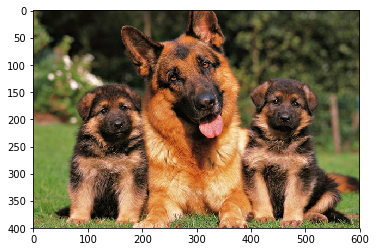

In [5]:
plt.imshow(im);

In [6]:
tr_center_crop = T.Compose([
        T.ToPILImage(),
        T.Resize(256),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

Visualize attention maps for each group:

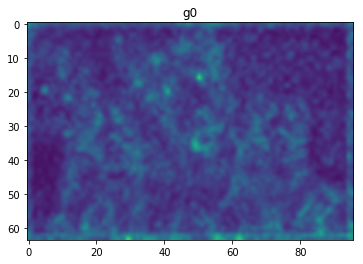

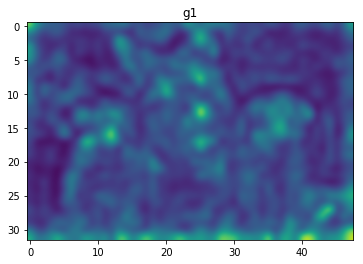

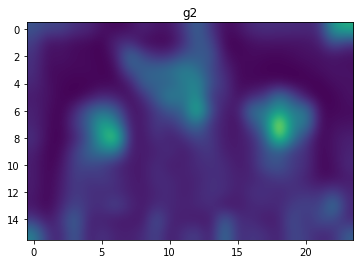

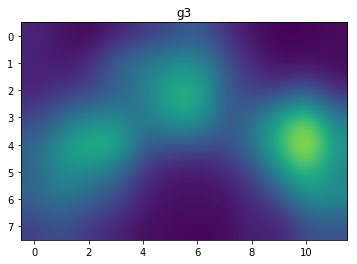

In [8]:
model.eval()
with torch.no_grad():
    x = tr_center_crop(im).unsqueeze(0)
    gs = model(x)

for i, g in enumerate(gs):
    plt.imshow(g[0], interpolation='bicubic')
    plt.title(f'g{i}')
    plt.show()